# Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![Overview2%20%281%29%20(1).jpg](attachment:Overview2%20%281%29%20(1).jpg)
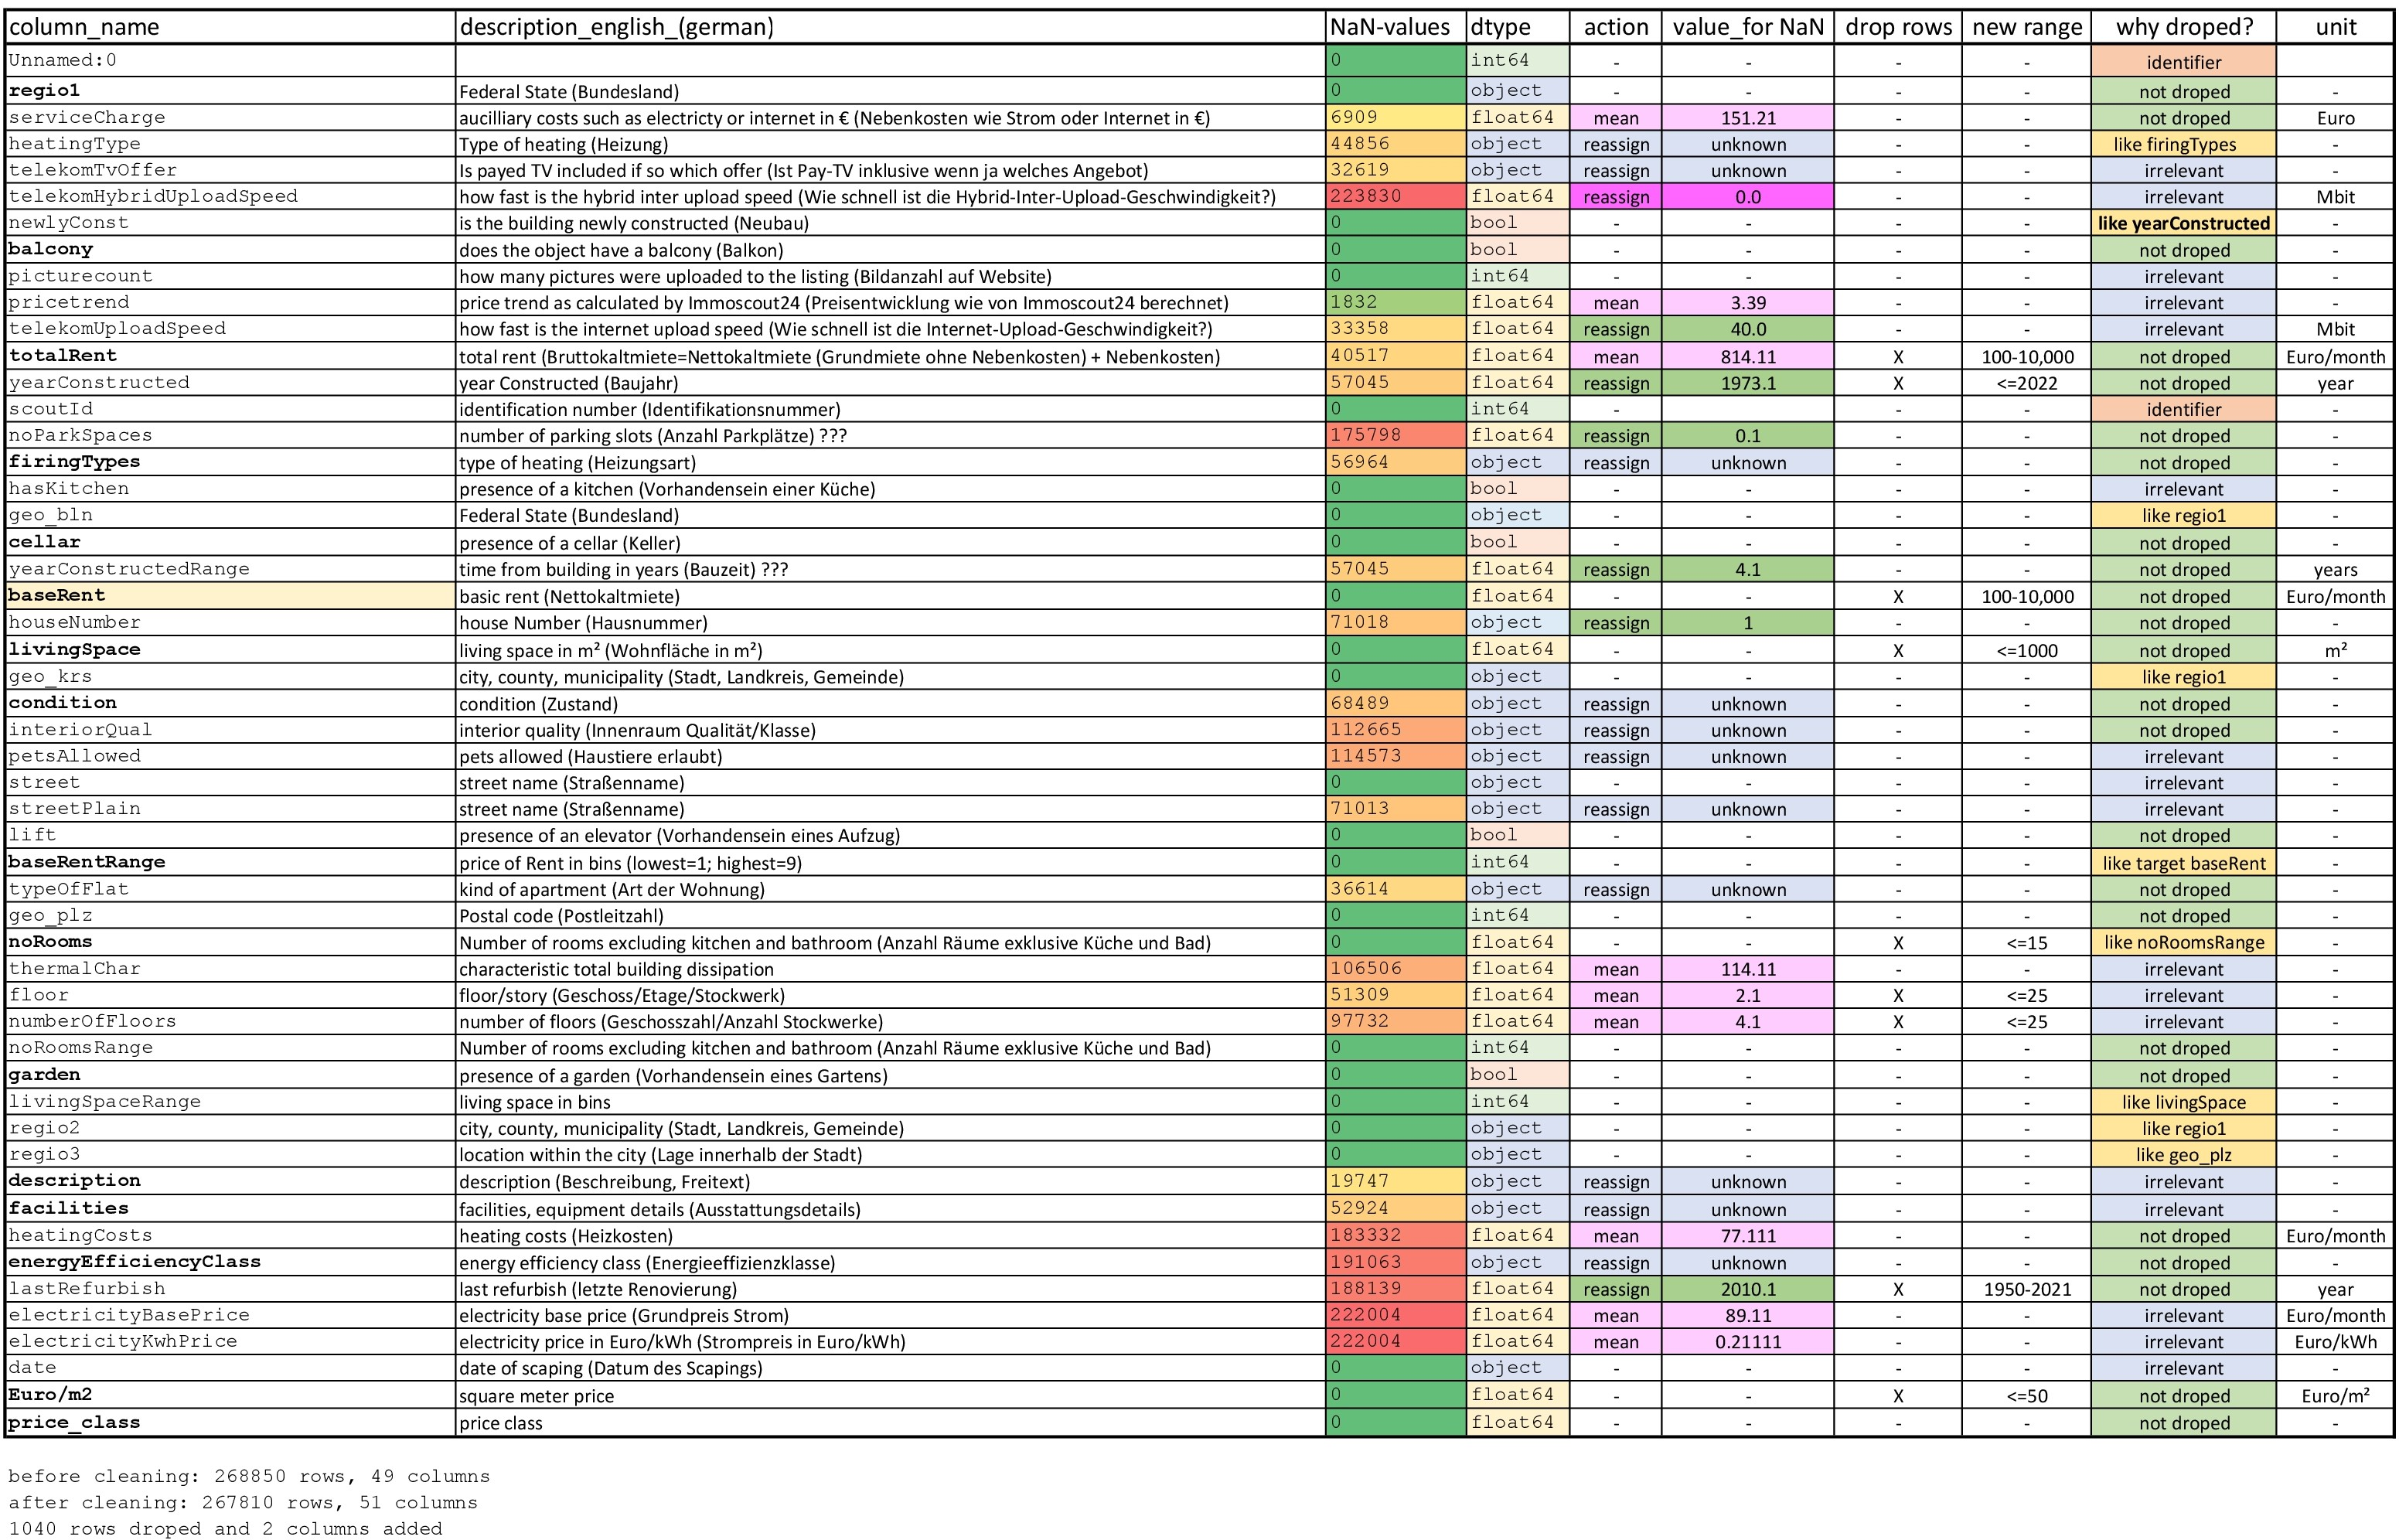

In [2]:
data = pd.read_csv('immo_data.csv')

In [3]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [4]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [5]:
data.shape

(268850, 49)

In [6]:
pd.set_option('display.max_columns', None)
data.sample(n = 4)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
12817,Nordrhein_Westfalen,216.0,NaN,ONE_YEAR_FREE,NaN,False,False,7,3.83,40.0,NaN,1962.0,114243778,NaN,NaN,False,Nordrhein_Westfalen,False,2.0,409.0,7,64.0,Borken_Kreis,NaN,NaN,NaN,Kurt-Ackermann-Stra&szlig;e,Kurt-Ackermann-Straße,False,3,roof_storey,48599,4.0,205.9,2.0,2.0,4,False,3,Borken_Kreis,Gronau_Westfalen,Die Wohnung befindet sich in einem Mehrfamilie...,Die Wohnung ist komplett mit PVC in Laminat-Op...,NaN,G,NaN,NaN,NaN,Feb20
45619,Brandenburg,230.0,district_heating,ONE_YEAR_FREE,NaN,False,True,23,5.19,40.0,2264.0,1876.0,114614613,NaN,NaN,True,Brandenburg,False,1.0,1704.0,17,142.0,Potsdam,refurbished,NaN,NaN,Helene-Lange-Str.,Helene-Lange-Str.,False,8,raised_ground_floor,14469,4.0,NaN,NaN,NaN,4,False,6,Potsdam,Nauener_Vorstadt,Die Stadtvilla wurde 2000 in Zusammenarbeit mi...,Alle Zimmer sind mit Pitsch-Pine Holzdielen ve...,330.0,NaN,2000.0,NaN,NaN,Feb20
55314,Sachsen,110.0,gas_heating,ONE_YEAR_FREE,10.0,False,True,5,2.14,2.4,850.0,1973.0,115667540,NaN,gas,True,Sachsen,True,3.0,590.0,18,119.0,Görlitz_Kreis,refurbished,normal,negotiable,Oberer Weg,Oberer_Weg,False,4,apartment,2894,6.0,106.0,2.0,4.0,5,False,5,Görlitz_Kreis,Reichenbach/Oberlausitz,Das Mehrfamilienhaus in der Thomas-Münzer-Stra...,Diese 6 Raum Wohnung ist eine Zusammenlegung v...,150.0,NaN,2019.0,NaN,NaN,Feb20
211789,Schleswig_Holstein,60.0,central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.17,40.0,600.0,1976.0,110344904,NaN,natural_gas_heavy,True,Schleswig_Holstein,True,3.0,450.0,19,75.0,Rendsburg_Eckernförde_Kreis,fully_renovated,normal,negotiable,Johannes Brahms Stra&szlig;e,Johannes_Brahms_Straße,False,3,apartment,24768,3.0,119.0,3.0,4.0,3,False,3,Rendsburg_Eckernförde_Kreis,Rendsburg,Angeboten wird eine helle 3-Zimmerwohnung in R...,Die Wohnung wird vollständig renoviert übergeben.,90.0,NO_INFORMATION,NaN,NaN,NaN,May19


In [7]:
state = data['regio1'].unique()
state

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

In [8]:
data["yearConstructedRange"].value_counts(dropna=False)

NaN    57045
1.0    54203
2.0    45661
9.0    28685
5.0    26291
3.0    24262
4.0    18011
8.0     7578
6.0     3638
7.0     3476
Name: yearConstructedRange, dtype: int64

In [9]:
data["condition"].value_counts(dropna=False)

NaN                                   68489
well_kept                             66591
refurbished                           26964
fully_renovated                       26368
first_time_use                        21959
mint_condition                        21938
modernized                            17226
first_time_use_after_refurbishment    15699
negotiable                             2240
need_of_renovation                     1372
ripe_for_demolition                       4
Name: condition, dtype: int64

In [10]:
data["interiorQual"].value_counts(dropna=False)

NaN              112665
normal            81826
sophisticated     64762
luxury             7648
simple             1949
Name: interiorQual, dtype: int64

In [11]:
pd.set_option('display.max_rows', 10)
data["street"].value_counts(dropna=False).head(10)

no_information            71013
Hauptstra&szlig;e           936
Bahnhofstra&szlig;e         853
Leipziger Stra&szlig;e      440
Goethestra&szlig;e          415
Bahnhofstr.                 410
Berliner Stra&szlig;e       381
Schillerstra&szlig;e        378
Gartenstra&szlig;e          360
Schulstra&szlig;e           349
Name: street, dtype: int64

In [12]:
data["streetPlain"].value_counts(dropna=False).head(10)

NaN                 71013
Hauptstraße           911
Bahnhofstraße         834
Leipziger_Straße      428
Goethestraße          406
Bahnhofstr.           401
Berliner_Straße       370
Schillerstraße        363
Gartenstraße          350
Hauptstr.             334
Name: streetPlain, dtype: int64

In [13]:
data["baseRentRange"].value_counts(dropna=False).head(10)

2    54546
1    48225
5    38000
3    37138
7    27495
4    25808
6    24210
8     8251
9     5177
Name: baseRentRange, dtype: int64

In [14]:
data["typeOfFlat"].value_counts(dropna=False).head(10)

apartment              131522
NaN                     36614
roof_storey             34787
ground_floor            31538
other                    9519
maisonette               9319
raised_ground_floor      5628
penthouse                3568
terraced_flat            3385
half_basement            2013
Name: typeOfFlat, dtype: int64

In [15]:
data["thermalChar"].value_counts(dropna=False).head(10)

NaN      106506
105.0       932
100.0       913
114.0       876
80.0        871
87.0        863
79.0        859
90.0        850
85.0        846
96.0        841
Name: thermalChar, dtype: int64

In [16]:
data["floor"].value_counts(dropna=False).head(10)

1.0    64133
2.0    56937
NaN    51309
3.0    37879
0.0    24604
4.0    19953
5.0     7987
6.0     2493
7.0     1031
8.0      578
Name: floor, dtype: int64

In [17]:
data["noRoomsRange"].value_counts(dropna=False).head(10)

3    100992
2     98728
1     31218
4     29851
5      8061
Name: noRoomsRange, dtype: int64

In [18]:
data["livingSpaceRange"].value_counts(dropna=False).head(10)


3    82458
2    76383
4    42789
1    27057
5    20523
6    12866
7     6774
Name: livingSpaceRange, dtype: int64

In [19]:
data["regio2"].value_counts(dropna=False)

Leipzig                         13723
Chemnitz                        12575
Berlin                          10406
Dresden                          7522
Magdeburg                        4860
                                ...  
Lichtenfels_Kreis                  31
Freyung_Grafenau_Kreis             30
Haßberge_Kreis                     24
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      12
Name: regio2, Length: 419, dtype: int64

In [20]:
data["regio3"].value_counts(dropna=False).head(10)

Innenstadt        4751
Stadtmitte        2697
Altstadt          2334
Sonnenberg        1913
Kaßberg           1712
Mitte             1611
Hilbersdorf       1297
Schloßchemnitz    1266
Zentrum           1135
Südstadt          1117
Name: regio3, dtype: int64

In [21]:
data["facilities"].value_counts(dropna=False).head(10)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           52924
Laminat                                                                                                                                                                                                             

In [22]:
data["heatingCosts"].value_counts(dropna=False).head(10)

NaN      183332
60.0       5310
70.0       4811
80.0       4763
50.0       4286
100.0      3970
90.0       3015
0.0        2754
75.0       2601
65.0       2588
Name: heatingCosts, dtype: int64

In [23]:
data["energyEfficiencyClass"].value_counts(dropna=False).head(20)

NaN               191063
C                  14613
NO_INFORMATION     14130
D                  13925
B                  11333
                   ...  
A                   4988
F                   4484
A_PLUS              3618
G                   1806
H                    903
Name: energyEfficiencyClass, Length: 11, dtype: int64

In [24]:
data["electricityBasePrice"].value_counts(dropna=False).head(20)

NaN      222004
90.76     42856
71.43      3990
Name: electricityBasePrice, dtype: int64

In [25]:
data["electricityKwhPrice"].value_counts(dropna=False).head(20)

NaN       222004
0.1985     14639
0.2055     13076
0.1915     10114
0.1845      2952
           ...  
0.2132       404
0.2144       358
0.1705       240
0.2195       239
0.2265       193
Name: electricityKwhPrice, Length: 16, dtype: int64

In [26]:
data.shape

(268850, 49)